# AWS Question (AWSQ)
AWS offers access to many cloud-based tools and services that simplify data processing, storage, and analysis. Thanks to AWS's scalable and affordable solutions, data scientists can work effectively with large datasets and carry out advanced analytics. A data scientist must, therefore, perform the essential task of learning how to use AWS. To complete a straightforward data analysis task in this question, you must set up an environment on Amazon Web Services. 

In this question, you are asked to provide the most commonly used tags for book lists. Going through the [__list.json__](https://www.kaggle.com/datasets/opalskies/large-books-metadata-dataset-50-mill-entries) file, you'll notice that each list has a list of tags attached, and we want to see what are the <ins>most popular tags</ins> across all of the lists. Please report the __top 5__ most frequently used tags and the number of times they appear in the lists.

You have to follow the following (recommended) steps:  
- Download the *list.json* file to your local system. 
- Write a Python script that generates the report and the system's time to generate it.
- Set up an EC2 instance on your AWS account and upload the list.json file together with your script to the instance
- Compare the running times of your script on your local system and the EC2 instances.

__Important note__: Please run the __same script__ on both your local system and your EC2 instance to compare the results. e.g., keep the parameters the same if you are processing the data by loading it partially and aggregating the results. Comment about the differences you find.

Please provide a report as follows: 
- The information about the config of the EC2 instance 
- The command used to connect to the EC2 
- The commands used to upload the files and run the script on the EC2 instance through your local system 
- A table containing the most popular tags and their number of usage
- A table containing the running time of the script on your local system and EC2 instance
  
The following is the expected outcome for the most popular tags:
|tag|#usage|
|---|---|
|romance|6001|
|fiction|5291|
|young-adult|5016|
|fantasy|3666|
|science-fiction|2779|

# REPORT

**- The information about the config of the EC2 instance:**
	
We started an EC2 instance with these configurations:
AMI (Amazon Machine Image): UBUNTU
Type of instance: t2.large since it has 8GB RAM which is fine for loading json file
Rest of configurations are default.

**- The command used to connect to the EC2:**

From the terminal we go to the directory containing our .pem file, we changed permission with this command:

Chmod 0600 AWS_HW2.pem

Then we used this command in order to connect to the EC2 instance via ssh:

ssh -i "AWS_HW2.pem" ubuntu@ec2-54-159-26-72.compute-1.amazonaws.com

where AWS_HW2.pem is the key to access and 54.159.26.72 is the public IP of the instance

**- The commands used to upload the files and run the script on the EC2 instance through your local system:**

We uploaded the file into an S3 bucket instance, which is an object storage service that stores data as objects within buckets, by dragging the files "list.json" and "tags.py" (the python script) in the specific area.
In order to copy the files from the S3 bucket to our EC2 instances we used this command line:

cp s3://awsadmhw2/list.json HW2

Where "s3://awsadmhw2/list.json" is the path for our list.json file and HW2 is a directory created in our EC2 instance (same goes for tags.py).

After installing the needed modules we ran the file with:

Python3 tags.py

**- A table containing the most popular tags and their number of usage:**


|tag|#usage|
|---|---|
|romance|6001|
|fiction|5291|
|young-adult|5016|
|fantasy|3666|
|science-fiction|2779|

**- A table containing the running time of the script on your local system and EC2 instance:**

|Script|Running time in seconds|
|---|---|
|Local system|99.22|
|EC2 Instance |38.99|

#### Script

In [ ]:
import pandas as pd
import json
import time

start_time = time.time()

chunksize = 10000
chunk_list = []

json_data = []

with open('list.json', 'r') as file:
    for line in file:
        try:
            data = json.loads(line)
            json_data.append(data)
        except json.JSONDecodeError:
            pass

list_df = pd.DataFrame(json_data)

# inizialize a dictionary
tags = {}

for tag in list_df['tags']:
    
    # avoid "nan"
    if type(tag) is not float:

        # iterate through list
        for t in tag:
        
            # if tag in dictionary increment the value (occurence) else set it to 1
            if t in tags:
                tags[t]+=1
            else:
                tags[t]=1

# sort the dict to get the 5 most common
tags = dict(sorted(tags.items(), key=lambda x: x[1], reverse=True))

tags_df  = pd.DataFrame({"tags": tags.keys(), "#usage": tags.values()})
print(tags_df.head(5))

end_time = time.time()
execution_time = (end_time - start_time)

print(f"Time passed: {round(execution_time, 2)} seconds")

#### Output local machine

![output local Machine.png](<attachment:output local Machine.png>)
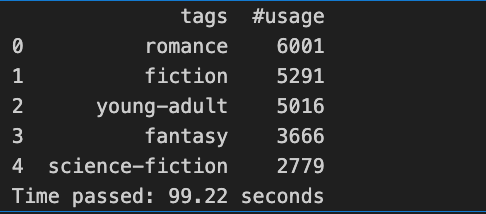

#### Ouput EC2 Instance

![output EC2.png](<attachment:output EC2.png>)
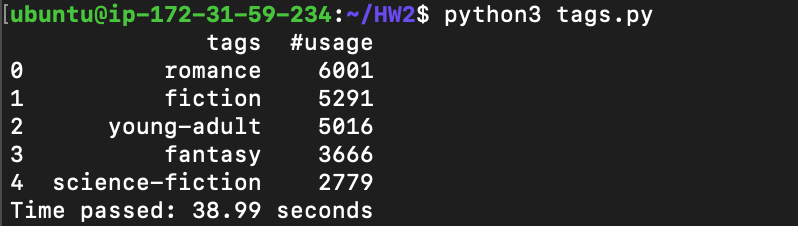